In [ ]:
import numpy as np
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
import math
from statistics import mean, stdev
from matplotlib import style
style.use('ggplot')
from pytrends.request import TrendReq

In [ ]:
pytrend = TrendReq(hl='en-US', tz=360)

In [ ]:
pytrends.build_payload(kw_list=['pizza', 'bagel'], timeframe=['2022-09-04 2022-09-10', '2022-09-18 2022-09-24'])
pytrends.multirange_interest_over_time()

NameError: name 'pytrends' is not defined

In [ ]:
data0 = pytrend.trending_searches(pn='russia')
data0.head(20)

,0
0,Спартак
1,День космонавтики
2,Челси
3,Матвиенко
4,Полное солнечное затмение 8 апреля
5,Манчестер Юнайтед – Ливерпуль
6,Дамба в Орске Оренбургской области
7,Президент Словакии
8,Украина
9,Зенит


In [ ]:
from pytrends.request import TrendReq
pytrend = TrendReq()
kw_list = ['pizza']
data =  pytrend.get_historical_interest(kw_list, year_start=2021, month_start=12, day_start=28, hour_start=0, year_end=2021, month_end=12, day_end=28, hour_end=23)
print(data)

NotImplementedError: This method has been removed for incorrectness. It will be removed completely in v5.
If you'd like similar functionality, please try implementing it yourself and consider submitting a pull request to add it to pytrends.
          
There is discussion at:
https://github.com/GeneralMills/pytrends/pull/542

In [ ]:
pytrend.build_payload(kw_list=['RuTube','VKontakte','WhatsApp','Telegram'],timeframe='today 5-y',geo='russia')
data1 = pytrend.interest_by_region()
data1.info()
data1.head(10)

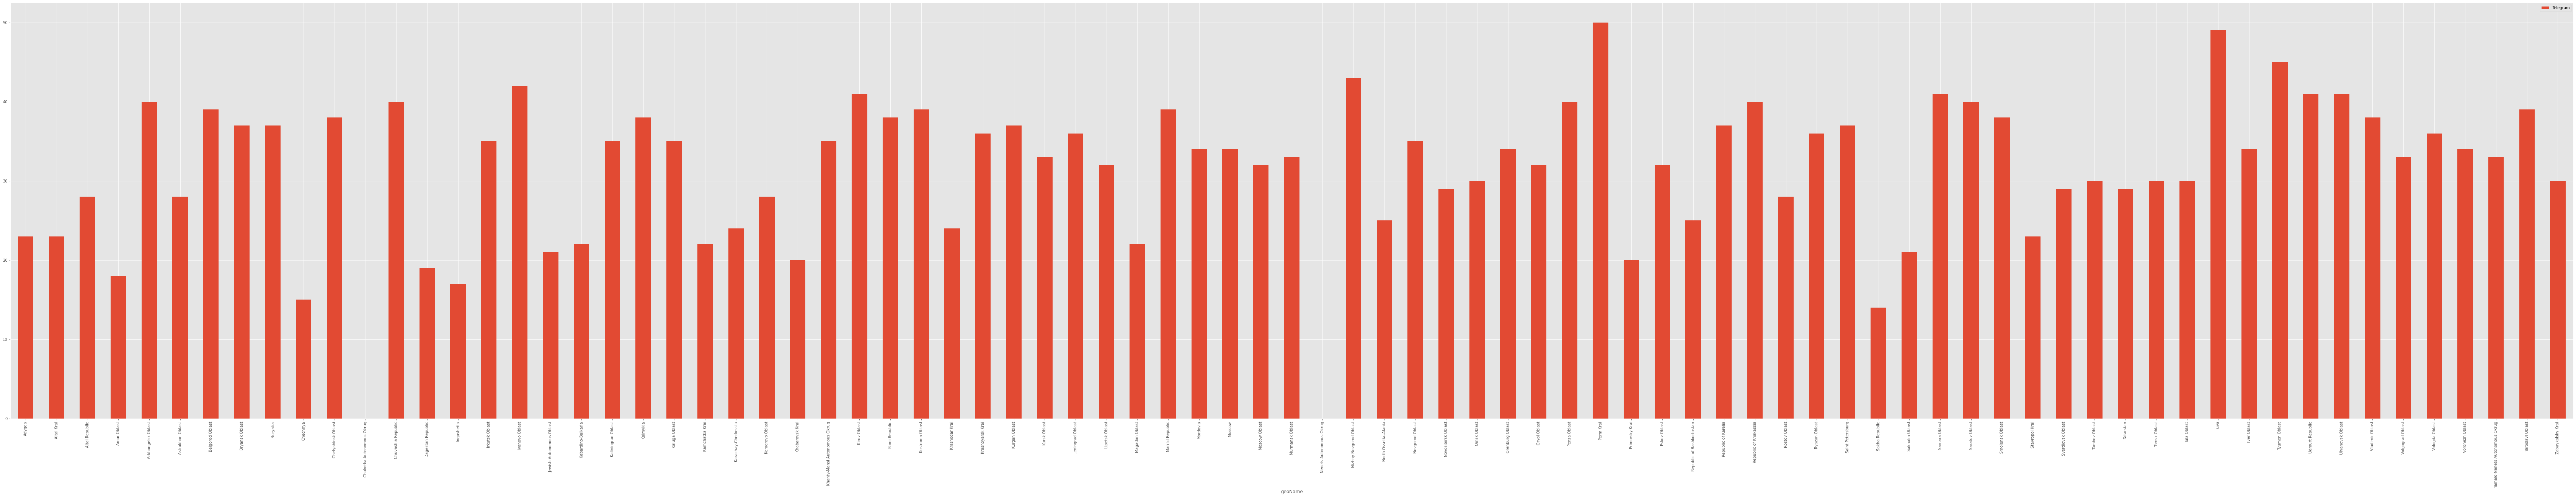

In [ ]:
data1.reset_index().plot(x='geoName', y='Telegram', figsize=(120, 20), kind ='bar')

In [ ]:
pytrend.build_payload(kw_list=['RuTube','VKontakte','WhatsApp','Telegram'],timeframe='today 5-y',geo='RU')
#'RuTube','VKontakte','Odnoklassniki','Telegram'
data2 = pytrend.interest_by_region()
data2.info()
data2.head(10)

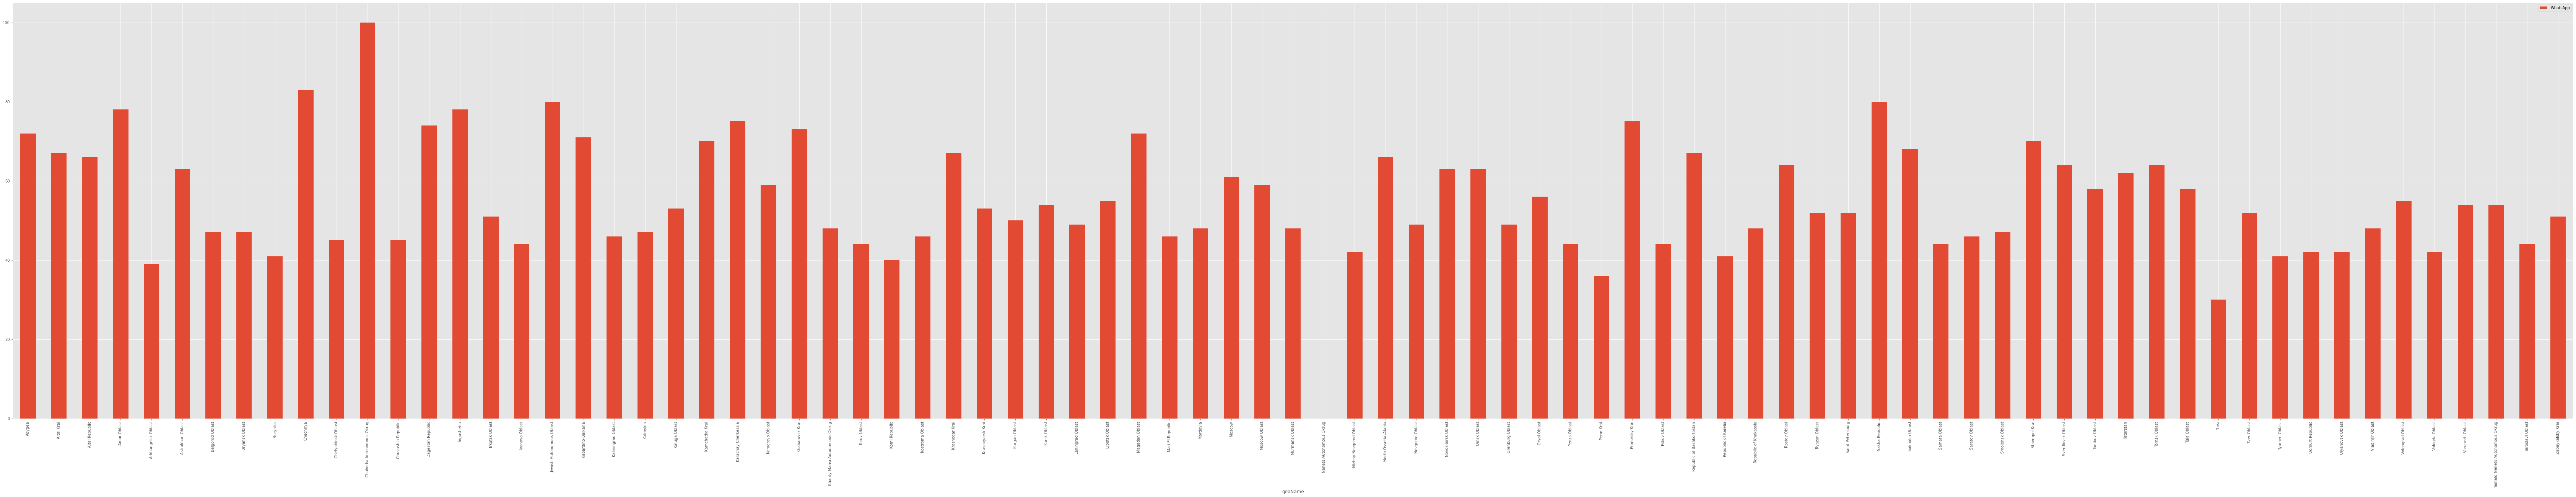

In [ ]:
data2.reset_index().plot(x='geoName', y='WhatsApp', figsize=(120, 20), kind ='bar')

In [ ]:
data = pytrend.interest_over_time()
# pytrend.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)
data.info()

In [ ]:
data.head(10)

In [ ]:
plot_series(data['Telegram']);

In [ ]:
data.index = data.index.to_period('D')
data.index

PeriodIndex(['2018-02-18', '2018-02-25', '2018-03-04', '2018-03-11',
             '2018-03-18', '2018-03-25', '2018-04-01', '2018-04-08',
             '2018-04-15', '2018-04-22',
             ...
             '2022-12-04', '2022-12-11', '2022-12-18', '2022-12-25',
             '2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
             '2023-01-29', '2023-02-05'],
            dtype='period[D]', length=260)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 261 entries, 2017-03-26 to 2022-03-20
Freq: D
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   YouTube    261 non-null    int64
 1   Facebook   261 non-null    int64
 2   Instagram  261 non-null    int64
 3   WhatsApp   261 non-null    int64
 4   isPartial  261 non-null    bool 
dtypes: bool(1), int64(4)
memory usage: 10.5 KB


In [ ]:
data = data.resample('M', convention='end').mean()

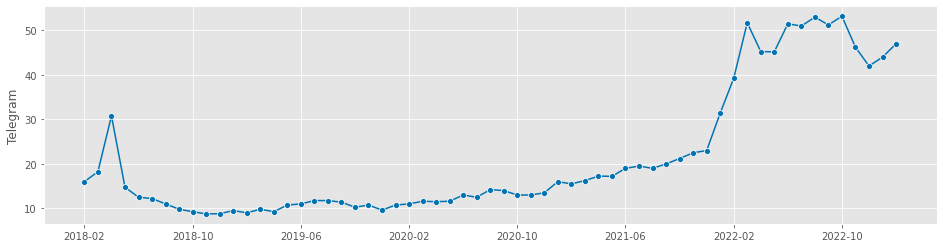

In [ ]:
plot_series(data['Telegram']);

((array([-2.28017173, -1.92017484, -1.7091256 , -1.55469152, -1.43036801,
         -1.3249031 , -1.23241216, -1.14940983, -1.07365152, -1.00360143,
         -0.93815914, -0.87650695, -0.81801894, -0.76220403, -0.70866868,
         -0.65709167, -0.60720655, -0.55878903, -0.51164772, -0.46561731,
         -0.42055328, -0.37632784, -0.33282677, -0.28994682, -0.24759369,
         -0.20568029, -0.16412527, -0.12285188, -0.08178679, -0.04085922,
          0.        ,  0.04085922,  0.08178679,  0.12285188,  0.16412527,
          0.20568029,  0.24759369,  0.28994682,  0.33282677,  0.37632784,
          0.42055328,  0.46561731,  0.51164772,  0.55878903,  0.60720655,
          0.65709167,  0.70866868,  0.76220403,  0.81801894,  0.87650695,
          0.93815914,  1.00360143,  1.07365152,  1.14940983,  1.23241216,
          1.3249031 ,  1.43036801,  1.55469152,  1.7091256 ,  1.92017484,
          2.28017173]),
  array([ 8.75,  8.8 ,  9.  ,  9.25,  9.25,  9.5 ,  9.6 ,  9.8 ,  9.8 ,
         10.25, 

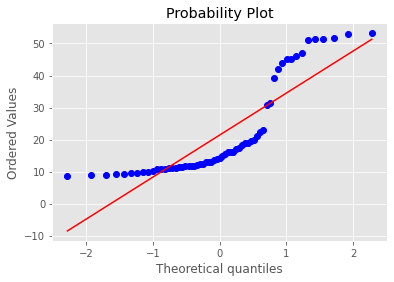

In [ ]:
probplot(data['Telegram'], plot=plt, dist='norm')

**ETS-модель**

In [ ]:
y_train, y_test = temporal_train_test_split(data['Telegram'], test_size=6)

In [ ]:
from sktime.forecasting.ets import AutoETS

In [ ]:
aaa = AutoETS(error='add', trend='add', seasonal='add', sp=2)
aaa.fit(y_train)

AutoETS(seasonal='add', sp=2, trend='add')

In [ ]:
aaa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:               Telegram   No. Observations:                   55
Model:                       ETS(AAA)   Log Likelihood                -151.664
Date:                Tue, 14 Feb 2023   AIC                            319.327
Time:                        10:49:55   BIC                            335.386
Sample:                    02-28-2018   HQIC                           325.537
                         - 08-31-2022   Scale                           14.544
Covariance Type:               approx                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.7959      0.155      5.137      0.000       0.492       1.100
smoothing_trend        0.0659      0.045      1.480      0.139      -0.021       0.153
smoothing_seasonal  2.041e-05        nan        nan        nan         nan         nan
initial_level         17.2647   1.93e+04      0.001      0.999   -3.79e+04    3.79e+04
initial_trend         -0.2413      1.311     -0.184      0.854      -2.812       2.329
initial_seasonal.0    -0.0670   1.93e+04  -3.47e-06      1.000   -3.79e+04    3.79e+04
initial_seasonal.1          0   1.93e+04          0      1.000   -3.79e+04    3.79e+04
===================================================================================
Ljung-Box (Q):                        1.25   Jarque-Bera (JB):                88.83
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.30
Prob(H) (two-sided):                  0.69   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [ ]:
horizon = np.arange(1, 7)
y_pred = aaa.predict(horizon)

In [ ]:
y_pred

2022-09    54.919171
2022-10    56.899973
2022-11    58.746771
2022-12    60.727573
2023-01    62.574372
2023-02    64.555174
Freq: M, Name: Telegram, dtype: float64

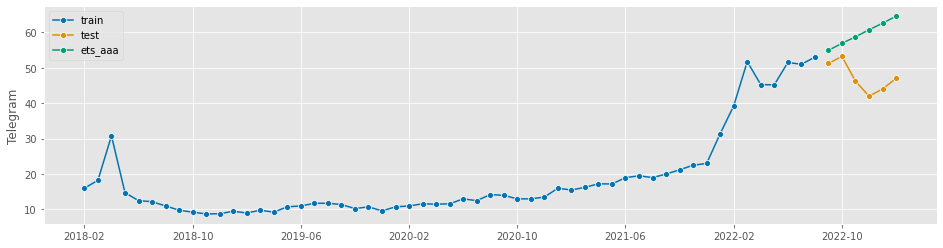

In [ ]:
plot_series(y_train, y_test, y_pred, labels=['train', 'test', 'ets_aaa']);

In [ ]:
from sktime.performance_metrics.forecasting import mape_loss
mape_loss(y_test, y_pred)

**ARIMA-модель**

In [ ]:
import statsmodels.api as sm
Facebook=data['Telegram']

test_DF = sm.tsa.adfuller(Facebook)
print('adf:', test_DF[0])
print('p-value:', test_DF[1])
print('critical values:', test_DF[4])
if test_DF[0] > test_DF[4]['5%']:
    print('есть единичные корни, ряд нестационарен при 5%-м уровне значимости')
else:
    print('единичных корней нет, ряд стационарен при 5%-м уровне значимости')
print("*"*20)
#%%

Facebook_diff1 = Facebook.diff(periods = 1).dropna()
test_DF_diff1 = sm.tsa.adfuller(Facebook_diff1)
print('adf:', test_DF_diff1[0])
print('p-value:', test_DF_diff1[1])
print('critical values:', test_DF_diff1[4])
if test_DF_diff1[0] > test_DF_diff1[4]['5%']:
    print('есть единичные корни, ряд нестационарен при 5%-м уровне значимости')
else:
    print('единичных корней нет, ряд стационарен при 5%-м уровне значимости')

adf: -0.3062569974718305
p-value: 0.9246134673636711
critical values: {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}
есть единичные корни, ряд нестационарен при 5%-м уровне значимости
********************
adf: -8.04599960865493
p-value: 1.7939381406982598e-12
critical values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
единичных корней нет, ряд стационарен при 5%-м уровне значимости


In [ ]:
test_KPSS = sm.tsa.kpss(Facebook)
print('KPSS:', test_KPSS[0])
print('p-value:', test_KPSS[1])
print('critical values:', test_KPSS[3])
if test_KPSS[0] > test_KPSS[3]['5%']:
    print('есть детерминированный тренд, ряд нестационарен при 5%-м уровне значимости')
else:
    print('нет детерминированного тренда, ряд стационарен при 5%-м уровне значимости')
print("*"*20)
#%%

Facebook_diff1 = Facebook.diff(periods = 1).dropna()
test_KPSS_diff1 = sm.tsa.kpss(Facebook_diff1)
print('KPSS:', test_KPSS_diff1[0])
print('p-value:', test_KPSS_diff1[1])
print('critical values:', test_KPSS_diff1[3])
if test_KPSS_diff1[0] > test_KPSS_diff1[3]['5%']:
    print('есть детерминированный тренд, ряд нестационарен при 5%-м уровне значимости')
else:
    print('нет детерминированного тренда, ряд стационарен при 5%-м уровне значимости')

KPSS: 0.4556865451845081
p-value: 0.05315235121357412
critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
нет детерминированного тренда, ряд стационарен при 5%-м уровне значимости
********************
KPSS: 0.2522031192609971
p-value: 0.1
critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
нет детерминированного тренда, ряд стационарен при 5%-м уровне значимости


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


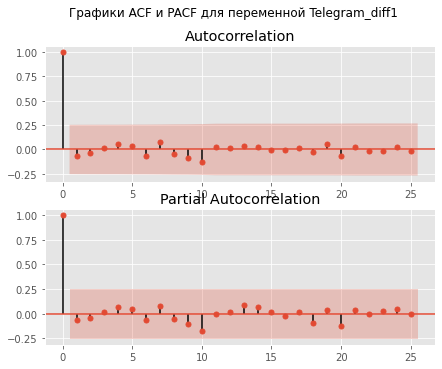

In [ ]:
fig = plt.figure(figsize=(7, 5.5))
fig.suptitle('Графики ACF и PACF для переменной Telegram_diff1')
ax3 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Facebook_diff1, lags = 25, ax = ax3)
ax4 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Facebook_diff1, lags = 25, ax = ax4)

In [ ]:
model = sm.tsa.ARIMA(y_train, order=(3, 1, 3)).fit()
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.Telegram   No. Observations:                   54
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -148.441
Method:                       css-mle   S.D. of innovations              3.726
Date:                Tue, 14 Feb 2023   AIC                            312.883
Time:                        10:52:16   BIC                            328.794
Sample:                    03-31-2018   HQIC                           319.019
                         - 08-31-2022                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6717      0.705      0.953      0.341      -0.710       2.054
ar.L1.D.Telegram     0.2078      0.613      0.339      0.734      -0.993       1.409
ar.L2.D.Telegram     0.7783 

In [ ]:
model.plot_diagnostics(lags=20)

In [ ]:
forecast=model.forecast(steps=6)
forecast

(array([53.85419845, 56.22300632, 56.81481482, 58.76006417, 59.34901095,
        61.00812154]),
 array([3.7259597 , 5.0745951 , 5.921813  , 6.96776332, 7.81635481,
        8.80936375]),
 array([[46.55145163, 61.15694526],
        [46.27698269, 66.16902995],
        [45.20827462, 68.42135502],
        [45.10349901, 72.41662933],
        [44.02923702, 74.66878488],
        [43.74208587, 78.27415721]]))

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7ae4ffa3d0>)

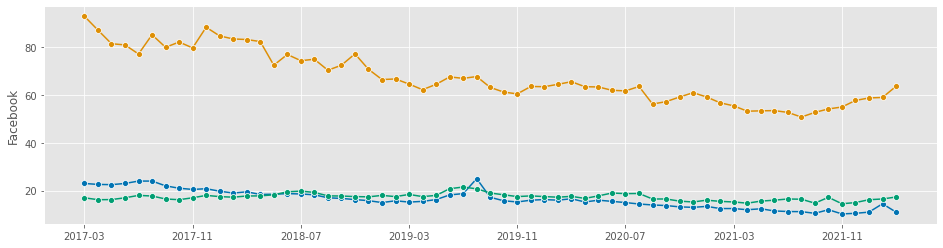

In [ ]:
plot_series(data['Facebook'],data['YouTube'],data['Instagram'])

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#from statsmodels.stats.stattools import durbin_watso
from sktime.utils.plotting import plot_series

In [ ]:
# Выбираем порядок
model = VAR(data)
for i in [1, 2, 3, 4]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -3.0390624546287803
BIC :  -1.9918901735177301
FPE :  0.04804059110952657
HQIC:  -2.629455808199828 

Lag Order = 2
AIC :  -2.4278514325568783
BIC :  -0.4911639848481566
FPE :  0.09019447951429224
HQIC:  -1.671847089543025 

Lag Order = 3
AIC :  -1.9295699806327562
BIC :  0.912420378741615
FPE :  0.15626323410443754
HQIC:  -0.8225573363318812 

Lag Order = 4
AIC :  -1.4221976934968836
BIC :  2.3413177998825514
FPE :  0.2892514850894102
HQIC:  0.04043267415565133 



In [ ]:
x = model.select_order(maxlags = 1)
x.summary()

,AIC,BIC,FPE,HQIC
0,1.785,1.959,5.959,1.853
1,-3.039*,-1.992*,0.04804*,-2.629*
